# 预处理降雨数据

In [17]:
import pandas as pd

# Read the Excel file
df = pd.read_excel("data\data_preprocessxlsx.xlsx", engine="openpyxl")

# Display the first few rows
print(df.head())

<>:4: SyntaxWarning: invalid escape sequence '\d'
<>:4: SyntaxWarning: invalid escape sequence '\d'
C:\Users\AORUS\AppData\Local\Temp\ipykernel_16336\3781301094.py:4: SyntaxWarning: invalid escape sequence '\d'
  df = pd.read_excel("data\data_preprocessxlsx.xlsx", engine="openpyxl")


    患者ID 是否复诊 是否住院 患者性别  患者年龄 患者职业 现在住址地市       发病日期 是否采集生物样本      食品分类  \
0      1    否    否    女  27.0   工人    嘉兴市 2022-05-17        是  水产动物及其制品   
1      1    否    否    女  27.0   工人    嘉兴市 2022-05-17        是  水产动物及其制品   
2      1    否    否    女  27.0   工人    嘉兴市 2022-05-17        是  水产动物及其制品   
3      2    否    否    男  63.0   农民    金华市 2023-10-17        否     肉与肉制品   
4      3    否    否    女  22.0   不详    温州市 2021-06-10        否     肉与肉制品   

  加工及包装方式 进食场所类型       进食日期 其他人是否发病 鉴定结果大类 鉴定结论  
0   餐饮服务业     其他 2022-05-17       否    NaN  NaN  
1   餐饮服务业     其他 2022-05-17       否    NaN  NaN  
2   餐饮服务业     其他 2022-05-17       否    NaN  NaN  
3    家庭自制     家庭 2023-10-17       否    NaN  NaN  
4   餐饮服务业     其他 2021-06-09       是    NaN  NaN  


In [18]:
city_list = df["现在住址地市"].unique()
city_list

array(['嘉兴市', '金华市', '温州市', '台州市', '丽水市', '杭州市', '衢州市', '绍兴市', '宁波市',
       '湖州市', '舟山市'], dtype=object)

In [19]:
df.keys()

Index([' 患者ID', '是否复诊', '是否住院', '患者性别', '患者年龄', '患者职业', '现在住址地市', '发病日期',
       '是否采集生物样本', '食品分类', '加工及包装方式', '进食场所类型', '进食日期', '其他人是否发病', '鉴定结果大类',
       '鉴定结论'],
      dtype='object')

### rename all filename

In [14]:
import os
import re

directory = r"data\降雨byday"

# Iterate through files in the directory
for filename in os.listdir(directory):
    match = re.match(r"(\d{4})\w*\.xlsm", filename)  # Match <year>xxxxx.xlsm
    if match:
        new_name = f"{match.group(1)}.xlsm"  # Keep only <year>.xlsm
        old_path = os.path.join(directory, filename)
        new_path = os.path.join(directory, new_name)

        # Rename the file
        os.rename(old_path, new_path)
        print(f"Renamed: {filename} -> {new_name}")

print("Renaming completed!")

Renamed: 1980年各城市降水量数据.xlsm -> 1980.xlsm
Renamed: 1981年各城市降水量数据.xlsm -> 1981.xlsm
Renamed: 1982年各城市降水量数据.xlsm -> 1982.xlsm
Renamed: 1983年各城市降水量数据.xlsm -> 1983.xlsm
Renamed: 1984年各城市降水量数据.xlsm -> 1984.xlsm
Renamed: 1985年各城市降水量数据.xlsm -> 1985.xlsm
Renamed: 1986年各城市降水量数据.xlsm -> 1986.xlsm
Renamed: 1987年各城市降水量数据.xlsm -> 1987.xlsm
Renamed: 1988年各城市降水量数据.xlsm -> 1988.xlsm
Renamed: 1989年各城市降水量数据.xlsm -> 1989.xlsm
Renamed: 1990年各城市降水量数据.xlsm -> 1990.xlsm
Renamed: 1991年各城市降水量数据.xlsm -> 1991.xlsm
Renamed: 1992年各城市降水量数据.xlsm -> 1992.xlsm
Renamed: 1993年各城市降水量数据.xlsm -> 1993.xlsm
Renamed: 1994年各城市降水量数据.xlsm -> 1994.xlsm
Renamed: 1995年各城市降水量数据.xlsm -> 1995.xlsm
Renamed: 1996年各城市降水量数据.xlsm -> 1996.xlsm
Renamed: 1997年各城市降水量数据.xlsm -> 1997.xlsm
Renamed: 1998年各城市降水量数据.xlsm -> 1998.xlsm
Renamed: 1999年各城市降水量数据.xlsm -> 1999.xlsm
Renamed: 2000年各城市降水量数据.xlsm -> 2000.xlsm
Renamed: 2001年各城市降水量数据.xlsm -> 2001.xlsm
Renamed: 2002年各城市降水量数据.xlsm -> 2002.xlsm
Renamed: 2003年各城市降水量数据.xlsm -> 2003.xlsm
Renamed: 2004年各城

### get weather hash
市降雨量 = $\sum_{i=1}^{区数量}区降雨量$

In [1]:
import pandas as pd
from src.utils.get_rain import get_province,  get_hash_by_date

weather_hash = {}
for year in range(2013, 2024):
    df_water = pd.read_excel(rf"data\降雨byday\{year}.xlsm", engine="openpyxl")
    df_water = get_province(df_water, "浙江省")  # Filter for province
    temp = get_hash_by_date(df_water)  # Get year-wise precipitation data
    
    for date, city_data in temp.items():
        if date not in weather_hash:
            weather_hash[date] = city_data  # Store new date entry
        else:
            weather_hash[date].update(city_data) 
    

Total unique dates stored in hash_map: 192
Total unique dates stored in hash_map: 192


KeyboardInterrupt: 

In [7]:
len(weather_hash.keys())

192

In [6]:
from pandas import Timestamp

weather_hash[Timestamp('2020-06-23')]

KeyError: Timestamp('2020-06-23 00:00:00')

In [6]:
df["发病日期"] = pd.to_datetime(df["发病日期"])

In [8]:
def get_waterdrop_history(df: pd.DataFrame, weather_dict: dict, days: int = 7) -> pd.DataFrame:
    # Ensure '发病日期' is in datetime format
    df["发病日期"] = pd.to_datetime(df["发病日期"])

    # Create new columns for past precipitation
    for i in range(1, days + 1):
        past_date_col = df["发病日期"] - pd.Timedelta(days=i)  # Compute past date
        df[f"Precipitation-before{i}day"] = past_date_col.map(
            lambda date: weather_dict.get(date, {}).get(df["现在住址地市"], 0)  # Vectorized lookup
        )

    return df

In [9]:
df = get_waterdrop_history(df, weather_hash)

TypeError: unhashable type: 'Series'

In [7]:
from src.utils.get_rain import get_waterdrop_history
df = get_waterdrop_history(df, weather_hash)

TypeError: unhashable type: 'Series'

In [ ]:
df.keys()

In [11]:
df.to_csv("data/data.csv", index=False, encoding="utf-8-sig")

# 预处理日照，气温

In [4]:
import pandas as pd

df = pd.read_csv("data/data.csv", encoding="utf-8-sig")

In [2]:
df_weather = pd.read_csv(r"data\1981-2023年逐日平均气温.csv",encoding="gb2312",index_col=0)
df_weather = df_weather.loc[:, ~df_weather.columns.str.match(r'^19[8-9]\d|^20(0\d|1[0-2])')]

In [3]:
df_weather

,省,省代码,市,市代码,20130101,20130102,20130103,20130104,20130105,20130106,...,20231222,20231223,20231224,20231225,20231226,20231227,20231228,20231229,20231230,20231231
0,安徽省,340000,安庆市,340800,3.217172,-0.100290,-3.742470,-3.308802,-1.209534,0.435638,...,-3.092045,-0.594956,0.930400,4.138332,6.610209,5.877824,6.717270,8.313837,8.749262,6.029553
1,安徽省,340000,蚌埠市,340300,2.037216,-2.627920,-5.047915,-3.985713,-2.261175,-0.848112,...,-3.870358,-1.333383,-1.543261,2.759632,5.387953,2.394401,2.689822,4.475715,5.691461,1.058152
2,安徽省,340000,亳州市,341600,1.840516,-3.409735,-5.156658,-4.764616,-2.986727,-1.211333,...,-2.961260,-1.133377,-0.989006,3.467602,4.600178,0.473429,1.282022,2.475132,4.869341,1.244602
3,安徽省,340000,池州市,341700,2.415883,-0.043569,-3.916417,-3.312586,-0.978706,0.145696,...,-3.287369,-1.370135,0.091424,3.442603,6.047559,6.199001,7.120386,8.508664,8.074881,5.546402
4,安徽省,340000,滁州市,341100,2.410519,-1.648695,-4.159316,-3.026623,-1.323823,-0.217306,...,-3.702243,-1.613155,-1.027553,2.389490,5.209587,3.892976,4.463162,5.823680,6.926278,2.498297
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
366,浙江省,330000,绍兴市,330600,4.095140,2.843103,-1.362818,-0.646438,0.788363,0.922026,...,-2.514913,0.734717,2.401899,2.943576,5.402673,8.703579,9.522042,9.386980,12.366268,8.311720
367,浙江省,330000,台州市,331000,5.496867,5.075476,0.723285,1.206207,2.603969,2.663293,...,-0.653924,3.495305,4.332955,4.596672,7.210694,10.412718,11.102891,10.363900,12.651668,9.624085
368,浙江省,330000,温州市,330300,6.990249,7.833682,2.942969,2.796520,4.626062,5.309483,...,1.642121,6.134940,6.220250,5.622746,8.867586,11.824625,12.938867,11.940731,13.298511,11.932897
369,浙江省,330000,舟山市,330900,4.847137,4.532329,0.695170,2.188554,2.797018,2.168203,...,-1.066560,2.374111,3.579166,3.027497,7.197001,10.255044,9.638082,9.509012,12.199501,7.157707


In [4]:
df

,患者ID,是否复诊,是否住院,患者性别,患者年龄,患者职业,现在住址地市,发病日期,是否采集生物样本,食品分类,加工及包装方式,进食场所类型,进食日期,其他人是否发病,鉴定结果大类,鉴定结论,降水量
0,1,否,否,女,27.0,工人,嘉兴市,2022-05-17,是,水产动物及其制品,餐饮服务业,其他,2022-05-17,否,NaN,NaN,0.0
1,1,否,否,女,27.0,工人,嘉兴市,2022-05-17,是,水产动物及其制品,餐饮服务业,其他,2022-05-17,否,NaN,NaN,0.0
2,1,否,否,女,27.0,工人,嘉兴市,2022-05-17,是,水产动物及其制品,餐饮服务业,其他,2022-05-17,否,NaN,NaN,0.0
3,2,否,否,男,63.0,农民,金华市,2023-10-17,否,肉与肉制品,家庭自制,家庭,2023-10-17,否,NaN,NaN,0.0
4,3,否,否,女,22.0,不详,温州市,2021-06-10,否,肉与肉制品,餐饮服务业,其他,2021-06-09,是,NaN,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564432,177055,否,否,男,26.0,农民,衢州市,2022-10-04,否,乳与乳制品,预包装,NaN,2022-10-04,否,NaN,NaN,0.0
564433,177056,否,否,女,40.0,家务及待业,丽水市,2022-12-07,否,水产动物及其制品,其他,家庭,2022-12-07,否,NaN,NaN,0.0
564434,177057,否,否,男,49.0,干部职员,丽水市,2022-11-28,否,乳与乳制品,预包装,家庭,2022-11-27,否,NaN,NaN,0.0
564435,177058,否,否,男,4.0,托幼儿童,丽水市,2022-11-21,否,蛋与蛋制品,家庭自制,家庭,2022-11-21,否,NaN,NaN,0.0


In [5]:
from src.utils.get_tempeature import get_province,convert_column_name,get_temperature_history

df_weather = get_province(df_weather, "浙江省")
df_weather

,省,省代码,市,市代码,20130101,20130102,20130103,20130104,20130105,20130106,...,20231222,20231223,20231224,20231225,20231226,20231227,20231228,20231229,20231230,20231231
359,浙江省,330000,杭州市,330100,3.259604,2.461369,-2.000825,-1.530698,0.280281,0.749197,...,-1.988175,0.575410,2.562373,3.747047,5.901839,8.222248,9.380576,9.351399,11.166905,8.357197
360,浙江省,330000,湖州市,330500,3.509335,1.505899,-1.996058,-1.146546,0.548933,0.893858,...,-2.841852,-0.680560,1.293152,2.504474,5.299609,7.435423,8.098738,7.819932,9.600846,6.256489
361,浙江省,330000,嘉兴市,330400,4.155924,2.642244,-1.005858,0.106193,1.344059,1.443513,...,-2.171650,0.546505,2.172584,2.784326,5.858766,8.804567,8.972134,8.420337,10.432370,6.960140
362,浙江省,330000,金华市,330700,4.328199,4.565483,-0.309297,-0.212322,1.310477,1.827852,...,-1.249760,1.658875,3.273611,3.935901,6.266608,9.110557,10.556707,10.556362,12.685767,9.965796
363,浙江省,330000,丽水市,331100,5.118372,6.748478,1.144344,0.763435,2.220244,2.946366,...,0.207734,2.856695,4.328616,4.701991,7.049327,9.721113,11.550834,11.760745,13.273122,11.833720
364,浙江省,330000,宁波市,330200,4.381831,3.719030,-0.241670,0.573522,1.799490,1.591708,...,-1.918426,1.918208,2.857275,3.284717,6.174046,9.557483,10.224152,9.415454,12.236382,8.423103
365,浙江省,330000,衢州市,330800,3.306984,4.757898,-0.739566,-1.142842,0.387036,1.241612,...,-0.927869,1.099122,2.681428,4.158243,6.172392,8.294733,10.076712,10.463888,12.355470,10.406035
366,浙江省,330000,绍兴市,330600,4.095140,2.843103,-1.362818,-0.646438,0.788363,0.922026,...,-2.514913,0.734717,2.401899,2.943576,5.402673,8.703579,9.522042,9.386980,12.366268,8.311720
367,浙江省,330000,台州市,331000,5.496867,5.075476,0.723285,1.206207,2.603969,2.663293,...,-0.653924,3.495305,4.332955,4.596672,7.210694,10.412718,11.102891,10.363900,12.651668,9.624085
368,浙江省,330000,温州市,330300,6.990249,7.833682,2.942969,2.796520,4.626062,5.309483,...,1.642121,6.134940,6.220250,5.622746,8.867586,11.824625,12.938867,11.940731,13.298511,11.932897


In [6]:
df_weather.columns = [convert_column_name(col) for col in df_weather.columns]

In [7]:
df_weather

,省,省代码,市,市代码,2013-01-01 00:00:00,2013-01-02 00:00:00,2013-01-03 00:00:00,2013-01-04 00:00:00,2013-01-05 00:00:00,2013-01-06 00:00:00,...,2023-12-22 00:00:00,2023-12-23 00:00:00,2023-12-24 00:00:00,2023-12-25 00:00:00,2023-12-26 00:00:00,2023-12-27 00:00:00,2023-12-28 00:00:00,2023-12-29 00:00:00,2023-12-30 00:00:00,2023-12-31 00:00:00
359,浙江省,330000,杭州市,330100,3.259604,2.461369,-2.000825,-1.530698,0.280281,0.749197,...,-1.988175,0.575410,2.562373,3.747047,5.901839,8.222248,9.380576,9.351399,11.166905,8.357197
360,浙江省,330000,湖州市,330500,3.509335,1.505899,-1.996058,-1.146546,0.548933,0.893858,...,-2.841852,-0.680560,1.293152,2.504474,5.299609,7.435423,8.098738,7.819932,9.600846,6.256489
361,浙江省,330000,嘉兴市,330400,4.155924,2.642244,-1.005858,0.106193,1.344059,1.443513,...,-2.171650,0.546505,2.172584,2.784326,5.858766,8.804567,8.972134,8.420337,10.432370,6.960140
362,浙江省,330000,金华市,330700,4.328199,4.565483,-0.309297,-0.212322,1.310477,1.827852,...,-1.249760,1.658875,3.273611,3.935901,6.266608,9.110557,10.556707,10.556362,12.685767,9.965796
363,浙江省,330000,丽水市,331100,5.118372,6.748478,1.144344,0.763435,2.220244,2.946366,...,0.207734,2.856695,4.328616,4.701991,7.049327,9.721113,11.550834,11.760745,13.273122,11.833720
364,浙江省,330000,宁波市,330200,4.381831,3.719030,-0.241670,0.573522,1.799490,1.591708,...,-1.918426,1.918208,2.857275,3.284717,6.174046,9.557483,10.224152,9.415454,12.236382,8.423103
365,浙江省,330000,衢州市,330800,3.306984,4.757898,-0.739566,-1.142842,0.387036,1.241612,...,-0.927869,1.099122,2.681428,4.158243,6.172392,8.294733,10.076712,10.463888,12.355470,10.406035
366,浙江省,330000,绍兴市,330600,4.095140,2.843103,-1.362818,-0.646438,0.788363,0.922026,...,-2.514913,0.734717,2.401899,2.943576,5.402673,8.703579,9.522042,9.386980,12.366268,8.311720
367,浙江省,330000,台州市,331000,5.496867,5.075476,0.723285,1.206207,2.603969,2.663293,...,-0.653924,3.495305,4.332955,4.596672,7.210694,10.412718,11.102891,10.363900,12.651668,9.624085
368,浙江省,330000,温州市,330300,6.990249,7.833682,2.942969,2.796520,4.626062,5.309483,...,1.642121,6.134940,6.220250,5.622746,8.867586,11.824625,12.938867,11.940731,13.298511,11.932897


In [8]:
df = get_temperature_history(df,df_weather,7)
df

,患者ID,是否复诊,是否住院,患者性别,患者年龄,患者职业,现在住址地市,发病日期,是否采集生物样本,食品分类,...,鉴定结果大类,鉴定结论,降水量,Temperature-before1day,Temperature-before2day,Temperature-before3day,Temperature-before4day,Temperature-before5day,Temperature-before6day,Temperature-before7day
0,1,否,否,女,27.0,工人,嘉兴市,2022-05-17,是,水产动物及其制品,...,NaN,NaN,0.0,19.450859,17.325065,18.022912,15.69578,17.872882,18.802054,18.796211
1,1,否,否,女,27.0,工人,嘉兴市,2022-05-17,是,水产动物及其制品,...,NaN,NaN,0.0,19.450859,17.325065,18.022912,15.69578,17.872882,18.802054,18.796211
2,1,否,否,女,27.0,工人,嘉兴市,2022-05-17,是,水产动物及其制品,...,NaN,NaN,0.0,19.450859,17.325065,18.022912,15.69578,17.872882,18.802054,18.796211
3,2,否,否,男,63.0,农民,金华市,2023-10-17,否,肉与肉制品,...,NaN,NaN,0.0,19.142827,19.428568,19.022599,19.634189,20.866985,18.601098,18.851912
4,3,否,否,女,22.0,不详,温州市,2021-06-10,否,肉与肉制品,...,NaN,NaN,0.0,27.192274,26.011637,24.449164,23.106728,20.481727,20.071709,27.021025
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564432,177055,否,否,男,26.0,农民,衢州市,2022-10-04,否,乳与乳制品,...,NaN,NaN,0.0,30.662027,29.871408,30.030178,28.689977,26.203724,26.65837,26.244053
564433,177056,否,否,女,40.0,家务及待业,丽水市,2022-12-07,否,水产动物及其制品,...,NaN,NaN,0.0,9.363357,7.801326,9.298979,9.127577,5.589593,3.819305,5.59696
564434,177057,否,否,男,49.0,干部职员,丽水市,2022-11-28,否,乳与乳制品,...,NaN,NaN,0.0,15.614301,18.837044,17.907945,17.521483,16.84317,18.156055,19.529726
564435,177058,否,否,男,4.0,托幼儿童,丽水市,2022-11-21,否,蛋与蛋制品,...,NaN,NaN,0.0,18.575637,18.25039,18.142675,18.915936,17.311793,14.466131,15.251207


In [9]:
df.to_csv("data/data.csv", index=False, encoding="utf-8-sig")

NameError: name 'df' is not defined

## merge with extra data

In [56]:
df = pd.read_csv("data/data.csv", encoding="utf-8-sig")

In [57]:
df

,患者ID,是否复诊,是否住院,患者性别,患者年龄,患者职业,现在住址地市,发病日期,是否采集生物样本,食品分类,...,鉴定结果大类,鉴定结论,降水量,Temperature-before1day,Temperature-before2day,Temperature-before3day,Temperature-before4day,Temperature-before5day,Temperature-before6day,Temperature-before7day
0,1,否,否,女,27.0,工人,嘉兴市,2022-05-17,是,水产动物及其制品,...,NaN,NaN,0.0,19.450859,17.325065,18.022912,15.695780,17.872882,18.802054,18.796211
1,1,否,否,女,27.0,工人,嘉兴市,2022-05-17,是,水产动物及其制品,...,NaN,NaN,0.0,19.450859,17.325065,18.022912,15.695780,17.872882,18.802054,18.796211
2,1,否,否,女,27.0,工人,嘉兴市,2022-05-17,是,水产动物及其制品,...,NaN,NaN,0.0,19.450859,17.325065,18.022912,15.695780,17.872882,18.802054,18.796211
3,2,否,否,男,63.0,农民,金华市,2023-10-17,否,肉与肉制品,...,NaN,NaN,0.0,19.142827,19.428568,19.022599,19.634189,20.866985,18.601098,18.851912
4,3,否,否,女,22.0,不详,温州市,2021-06-10,否,肉与肉制品,...,NaN,NaN,0.0,27.192274,26.011637,24.449164,23.106728,20.481727,20.071709,27.021025
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564432,177055,否,否,男,26.0,农民,衢州市,2022-10-04,否,乳与乳制品,...,NaN,NaN,0.0,30.662027,29.871408,30.030178,28.689977,26.203724,26.658370,26.244053
564433,177056,否,否,女,40.0,家务及待业,丽水市,2022-12-07,否,水产动物及其制品,...,NaN,NaN,0.0,9.363357,7.801326,9.298979,9.127577,5.589593,3.819305,5.596960
564434,177057,否,否,男,49.0,干部职员,丽水市,2022-11-28,否,乳与乳制品,...,NaN,NaN,0.0,15.614301,18.837044,17.907945,17.521483,16.843170,18.156055,19.529726
564435,177058,否,否,男,4.0,托幼儿童,丽水市,2022-11-21,否,蛋与蛋制品,...,NaN,NaN,0.0,18.575637,18.250390,18.142675,18.915936,17.311793,14.466131,15.251207


In [58]:
df_extra = pd.read_excel("data\Copy of extra_data.xlsx", engine="openpyxl")

<>:1: SyntaxWarning: invalid escape sequence '\C'
<>:1: SyntaxWarning: invalid escape sequence '\C'
C:\Users\AORUS\AppData\Local\Temp\ipykernel_20684\1622478863.py:1: SyntaxWarning: invalid escape sequence '\C'
  df_extra = pd.read_excel("data\Copy of extra_data.xlsx", engine="openpyxl")


In [59]:
df_extra = df_extra.loc[:, "气候政策不确定性指数":]

In [60]:
df_combined = pd.concat([df, df_extra], axis=1)

In [61]:
df_combined.keys()

Index([' 患者ID', '是否复诊', '是否住院', '患者性别', '患者年龄', '患者职业', '现在住址地市', '发病日期',
       '是否采集生物样本', '食品分类', '加工及包装方式', '进食场所类型', '进食日期', '其他人是否发病', '鉴定结果大类',
       '鉴定结论', '降水量', 'Temperature-before1day', 'Temperature-before2day',
       'Temperature-before3day', 'Temperature-before4day',
       'Temperature-before5day', 'Temperature-before6day',
       'Temperature-before7day', '气候政策不确定性指数', '环保处罚案件数目', 'AQI', '质量等级',
       '经济核算-生产总值（亿元）', '经济核算-人均生产总值（元）', '工资-城镇单位就业人员工资总额和平均工资-平均工资（元）',
       '农业-农、林、牧、渔业总产值（亿元）-农业产值（亿元）', '农业-农、林、牧、渔业总产值（亿元）-林业产值（亿元）',
       '农业-农、林、牧、渔业总产值（亿元）-牧业产值（亿元）', '农业-农、林、牧、渔业总产值（亿元）-渔业产值（亿元）',
       '农业-农、林、牧、渔业总产值（亿元）-农林牧渔业服务业产值（亿元）', '农业-主要农产品产量-肉产量（吨）',
       '农业-主要农产品产量-肉产量（吨）-猪肉产量（吨）', '农业-主要农产品产量-禽蛋产量（吨）', '农业-主要农产品产量-牛奶产量（吨）',
       '农业-水产品产量（万吨）-海水产品产量（万吨）', '农业-水产品产量（万吨）-淡水产品产量（万吨）',
       '农业-农村能源及农业物资消耗-农药使用量（吨）', '文化、卫生和社会服务-文化和卫生-医院卫生院数（个）',
       '文化、卫生和社会服务-文化和卫生-医院卫生床位数（张）', '文化、卫生和社会服务-文化和卫生-医生数（人）',
       '环境与资源-日照时数-1月日照时数（0.1小时）', '

In [62]:
# df_combined = df_combined.drop_duplicates(subset=" 患者ID", keep="first")

In [63]:
df_combined

,患者ID,是否复诊,是否住院,患者性别,患者年龄,患者职业,现在住址地市,发病日期,是否采集生物样本,食品分类,...,环境与资源-日照时数-4月日照时数（0.1小时）,环境与资源-日照时数-5月日照时数（0.1小时）,环境与资源-日照时数-6月日照时数（0.1小时）,环境与资源-日照时数-7月日照时数（0.1小时）,环境与资源-日照时数-8月日照时数（0.1小时）,环境与资源-日照时数-9月日照时数（0.1小时）,环境与资源-日照时数-10月日照时数（0.1小时）,环境与资源-日照时数-11月日照时数（0.1小时）,环境与资源-日照时数-12月日照时数（0.1小时）,环境与资源-日照时数-全年日照时数（0.1小时）
0,1,否,否,女,27.0,工人,嘉兴市,2022-05-17,是,水产动物及其制品,...,1454.0,1339.0,1345.0,1924.0,2256.0,1021.0,1450.0,929.0,1277.0,15841.0
1,1,否,否,女,27.0,工人,嘉兴市,2022-05-17,是,水产动物及其制品,...,1454.0,1339.0,1345.0,1924.0,2256.0,1021.0,1450.0,929.0,1277.0,15841.0
2,1,否,否,女,27.0,工人,嘉兴市,2022-05-17,是,水产动物及其制品,...,1454.0,1339.0,1345.0,1924.0,2256.0,1021.0,1450.0,929.0,1277.0,15841.0
3,2,否,否,男,63.0,农民,金华市,2023-10-17,否,肉与肉制品,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,3,否,否,女,22.0,不详,温州市,2021-06-10,否,肉与肉制品,...,997.0,803.0,864.0,1189.0,891.0,1689.0,783.0,879.0,768.0,11632.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564432,177055,否,否,男,26.0,农民,衢州市,2022-10-04,否,乳与乳制品,...,1354.0,1019.0,1222.0,2863.0,3140.0,1942.0,1791.0,753.0,986.0,17247.0
564433,177056,否,否,女,40.0,家务及待业,丽水市,2022-12-07,否,水产动物及其制品,...,1519.0,1003.0,1124.0,2850.0,2928.0,1984.0,1765.0,549.0,896.0,17095.0
564434,177057,否,否,男,49.0,干部职员,丽水市,2022-11-28,否,乳与乳制品,...,1519.0,1003.0,1124.0,2850.0,2928.0,1984.0,1765.0,549.0,896.0,17095.0
564435,177058,否,否,男,4.0,托幼儿童,丽水市,2022-11-21,否,蛋与蛋制品,...,1519.0,1003.0,1124.0,2850.0,2928.0,1984.0,1765.0,549.0,896.0,17095.0


In [64]:
df_combined.to_csv('data/final_data.csv', index=False, encoding="utf-8-sig")

# Preprocess

In [65]:
import pandas as pd


df_combined = pd.read_csv('data/final_data.csv', encoding="utf-8-sig")

In [66]:
df_combined["是否复诊"] = df_combined["是否复诊"].map({"是": 1, "否": 0})

In [67]:
df_combined["是否住院"] = df_combined["是否住院"].map({"是": 1, "否": 0})

In [68]:
df_combined["患者性别"] = df_combined["患者性别"].map({"男": 1, "女": 0})

In [69]:
df_combined = pd.get_dummies(df_combined, columns=["患者职业"], drop_first=True)

In [70]:
# from sklearn.preprocessing import StandardScaler

# scaler = StandardScaler()

# # Fit and transform "患者年龄"
# df_combined["患者年龄"] = scaler.fit_transform(df_combined[["患者年龄"]])

# # Get mean (μ) and standard deviation (σ) before standardization
# mu = scaler.mean_[0]
# sigma = scaler.scale_[0]

# print(f"Mean (μ) before standardization: {mu}")
# print(f"Standard Deviation (σ) before standardization: {sigma}")


In [71]:
df_combined = pd.get_dummies(df_combined, columns=["现在住址地市"], drop_first=True)

In [72]:
df_combined["是否采集生物样本"] = df_combined["是否采集生物样本"].map({"是": 1, "否": 0})

In [73]:
df_combined = pd.get_dummies(df_combined, columns=["食品分类"], drop_first=True)

In [74]:
df_combined = pd.get_dummies(df_combined, columns=["加工及包装方式"], drop_first=True)

In [75]:
df_combined["进食场所类型"] = df_combined["进食场所类型"].replace("进食场所类型", "其他")
df_combined = pd.get_dummies(df_combined, columns=["进食场所类型"], drop_first=True)

将进食日期feature转换成"进食-发病时间差"

In [76]:
df_combined["发病日期"] = pd.to_datetime(df_combined["发病日期"])
df_combined["进食日期"] = pd.to_datetime(df_combined["进食日期"])
df_combined["进食-发病时间差"] = (df_combined["发病日期"] - df_combined["进食日期"]).dt.days
df_combined.drop(columns=["进食日期"], inplace=True)

In [77]:
df_combined["其他人是否发病"] = df_combined["其他人是否发病"].map({"是": 1, "否": 0})

In [78]:
df_combined["鉴定结果大类"].fillna("/", inplace=True)
df_combined["食源性疾病"] = df_combined["鉴定结果大类"].apply(lambda x: 0 if x == "/" or x == None else 1)
df_combined.drop(columns=["鉴定结果大类"], inplace=True)
df_combined.drop(columns=['鉴定结论'], inplace=True)

C:\Users\AORUS\AppData\Local\Temp\ipykernel_20684\370073846.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_combined["鉴定结果大类"].fillna("/", inplace=True)


In [79]:
df_combined["气候政策不确定性指数"].fillna(df_combined["气候政策不确定性指数"].median(), inplace=True)


C:\Users\AORUS\AppData\Local\Temp\ipykernel_20684\227248969.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_combined["气候政策不确定性指数"].fillna(df_combined["气候政策不确定性指数"].median(), inplace=True)


In [80]:
df_combined["环保处罚案件数目"].fillna(df_combined["环保处罚案件数目"].median(), inplace=True)


C:\Users\AORUS\AppData\Local\Temp\ipykernel_20684\639462223.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_combined["环保处罚案件数目"].fillna(df_combined["环保处罚案件数目"].median(), inplace=True)


In [81]:
df_combined["AQI"].fillna(df_combined["AQI"].median(), inplace=True)


C:\Users\AORUS\AppData\Local\Temp\ipykernel_20684\315744404.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_combined["AQI"].fillna(df_combined["AQI"].median(), inplace=True)


In [82]:
df_combined["质量等级"] = df_combined["质量等级"].map({"中度污染":3,"轻度污染": 2 ,"良": 1, "优": 0})
df_combined["质量等级"].fillna(df_combined["质量等级"].median(), inplace=True)

C:\Users\AORUS\AppData\Local\Temp\ipykernel_20684\702816254.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_combined["质量等级"].fillna(df_combined["质量等级"].median(), inplace=True)


In [83]:
numerical_feature = ['经济核算-生产总值（亿元）',
 '经济核算-人均生产总值（元）',
 '工资-城镇单位就业人员工资总额和平均工资-平均工资（元）',
 '农业-农、林、牧、渔业总产值（亿元）-农业产值（亿元）',
 '农业-农、林、牧、渔业总产值（亿元）-林业产值（亿元）',
 '农业-农、林、牧、渔业总产值（亿元）-牧业产值（亿元）',
 '农业-农、林、牧、渔业总产值（亿元）-渔业产值（亿元）',
 '农业-农、林、牧、渔业总产值（亿元）-农林牧渔业服务业产值（亿元）',
 '农业-主要农产品产量-肉产量（吨）',
 '农业-主要农产品产量-肉产量（吨）-猪肉产量（吨）',
 '农业-主要农产品产量-禽蛋产量（吨）',
 '农业-主要农产品产量-牛奶产量（吨）',
 '农业-水产品产量（万吨）-海水产品产量（万吨）',
 '农业-水产品产量（万吨）-淡水产品产量（万吨）',
 '农业-农村能源及农业物资消耗-农药使用量（吨）',
 '文化、卫生和社会服务-文化和卫生-医院卫生院数（个）',
 '文化、卫生和社会服务-文化和卫生-医院卫生床位数（张）',
 '文化、卫生和社会服务-文化和卫生-医生数（人）',
 '环境与资源-日照时数-1月日照时数（0.1小时）',
 '环境与资源-日照时数-2月日照时数（0.1小时）',
 '环境与资源-日照时数-3月日照时数（0.1小时）',
 '环境与资源-日照时数-4月日照时数（0.1小时）',
 '环境与资源-日照时数-5月日照时数（0.1小时）',
 '环境与资源-日照时数-6月日照时数（0.1小时）',
 '环境与资源-日照时数-7月日照时数（0.1小时）',
 '环境与资源-日照时数-8月日照时数（0.1小时）',
 '环境与资源-日照时数-9月日照时数（0.1小时）',
 '环境与资源-日照时数-10月日照时数（0.1小时）',
 '环境与资源-日照时数-11月日照时数（0.1小时）',
 '环境与资源-日照时数-12月日照时数（0.1小时）',
 '环境与资源-日照时数-全年日照时数（0.1小时）']

In [84]:
for feature in numerical_feature:
    df_combined[feature].fillna(df_combined[feature].median(), inplace=True)

C:\Users\AORUS\AppData\Local\Temp\ipykernel_20684\3331109971.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_combined[feature].fillna(df_combined[feature].median(), inplace=True)
C:\Users\AORUS\AppData\Local\Temp\ipykernel_20684\3331109971.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always beh

In [85]:
boolean_feature = ['患者职业_其他',
 '患者职业_农民',
 '患者职业_医务人员',
 '患者职业_商业服务',
 '患者职业_学生',
 '患者职业_家务及待业',
 '患者职业_工人',
 '患者职业_干部职员',
 '患者职业_托幼儿童',
 '患者职业_教师',
 '患者职业_散居儿童',
 '患者职业_民工',
 '患者职业_渔民',
 '患者职业_牧民',
 '患者职业_离退人员',
 '患者职业_餐饮食品业',
 '现在住址地市_台州市',
 '现在住址地市_嘉兴市',
 '现在住址地市_宁波市',
 '现在住址地市_杭州市',
 '现在住址地市_温州市',
 '现在住址地市_湖州市',
 '现在住址地市_绍兴市',
 '现在住址地市_舟山市',
 '现在住址地市_衢州市',
 '现在住址地市_金华市',
 '食品分类_水产动物及其制品',
 '食品分类_油脂类',
 '食品分类_肉与肉制品',
 '食品分类_蛋与蛋制品',
 '加工及包装方式_家庭自制',
 '加工及包装方式_散装（包括简易包装）',
 '加工及包装方式_预包装',
 '加工及包装方式_餐饮服务业',
 '进食场所类型_农村宴席',
 '进食场所类型_学校',
 '进食场所类型_家庭',
 '进食场所类型_集体食堂',
 '进食场所类型_零售市场',
 '进食场所类型_餐饮服务业']

In [86]:
for feature in boolean_feature:
    df_combined[feature] = df_combined[feature].map({True: 1, False: 0})

In [87]:
df_combined.to_csv('data/solved_data.csv', index=False, encoding="utf-8-sig")

In [88]:
df_combined["质量等级"].value_counts()

质量等级
1.0    484048
0.0     72335
2.0      7888
3.0       166
Name: count, dtype: int64

In [89]:
print(df_combined.keys())

Index([' 患者ID', '是否复诊', '是否住院', '患者性别', '患者年龄', '发病日期', '是否采集生物样本', '其他人是否发病',
       '降水量', 'Temperature-before1day', 'Temperature-before2day',
       'Temperature-before3day', 'Temperature-before4day',
       'Temperature-before5day', 'Temperature-before6day',
       'Temperature-before7day', '气候政策不确定性指数', '环保处罚案件数目', 'AQI', '质量等级',
       '经济核算-生产总值（亿元）', '经济核算-人均生产总值（元）', '工资-城镇单位就业人员工资总额和平均工资-平均工资（元）',
       '农业-农、林、牧、渔业总产值（亿元）-农业产值（亿元）', '农业-农、林、牧、渔业总产值（亿元）-林业产值（亿元）',
       '农业-农、林、牧、渔业总产值（亿元）-牧业产值（亿元）', '农业-农、林、牧、渔业总产值（亿元）-渔业产值（亿元）',
       '农业-农、林、牧、渔业总产值（亿元）-农林牧渔业服务业产值（亿元）', '农业-主要农产品产量-肉产量（吨）',
       '农业-主要农产品产量-肉产量（吨）-猪肉产量（吨）', '农业-主要农产品产量-禽蛋产量（吨）', '农业-主要农产品产量-牛奶产量（吨）',
       '农业-水产品产量（万吨）-海水产品产量（万吨）', '农业-水产品产量（万吨）-淡水产品产量（万吨）',
       '农业-农村能源及农业物资消耗-农药使用量（吨）', '文化、卫生和社会服务-文化和卫生-医院卫生院数（个）',
       '文化、卫生和社会服务-文化和卫生-医院卫生床位数（张）', '文化、卫生和社会服务-文化和卫生-医生数（人）',
       '环境与资源-日照时数-1月日照时数（0.1小时）', '环境与资源-日照时数-2月日照时数（0.1小时）',
       '环境与资源-日照时数-3月日照时数（0.1小时）', '环境与资源-日照时数-4月日照时数

# 数据分析

In [6]:
import pandas as pd

df = pd.read_csv("data\solved_data.csv",encoding="utf-8-sig")

<>:3: SyntaxWarning: invalid escape sequence '\s'
<>:3: SyntaxWarning: invalid escape sequence '\s'
C:\Users\AORUS\AppData\Local\Temp\ipykernel_18828\489878298.py:3: SyntaxWarning: invalid escape sequence '\s'
  df = pd.read_csv("data\solved_data.csv",encoding="utf-8-sig")


In [2]:
df

,患者ID,是否复诊,是否住院,患者性别,患者年龄,发病日期,是否采集生物样本,其他人是否发病,降水量,Temperature-before1day,...,加工及包装方式_预包装,加工及包装方式_餐饮服务业,进食场所类型_农村宴席,进食场所类型_学校,进食场所类型_家庭,进食场所类型_集体食堂,进食场所类型_零售市场,进食场所类型_餐饮服务业,进食-发病时间差,食源性疾病
0,1,0,0,0,27.0,2022-05-17,1,0,0.0,19.450859,...,0,1,0,0,0,0,0,0,0.0,0
1,1,0,0,0,27.0,2022-05-17,1,0,0.0,19.450859,...,0,1,0,0,0,0,0,0,0.0,0
2,1,0,0,0,27.0,2022-05-17,1,0,0.0,19.450859,...,0,1,0,0,0,0,0,0,0.0,0
3,2,0,0,1,63.0,2023-10-17,0,0,0.0,19.142827,...,0,0,0,0,1,0,0,0,0.0,0
4,3,0,0,0,22.0,2021-06-10,0,1,0.0,27.192274,...,0,1,0,0,0,0,0,0,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564432,177055,0,0,1,26.0,2022-10-04,0,0,0.0,30.662027,...,1,0,0,0,0,0,0,0,0.0,0
564433,177056,0,0,0,40.0,2022-12-07,0,0,0.0,9.363357,...,0,0,0,0,1,0,0,0,0.0,0
564434,177057,0,0,1,49.0,2022-11-28,0,0,0.0,15.614301,...,1,0,0,0,1,0,0,0,1.0,0
564435,177058,0,0,1,4.0,2022-11-21,0,0,0.0,18.575637,...,0,0,0,0,1,0,0,0,0.0,0


## 总的发病率

In [92]:
f"{df["食源性疾病"].sum()/len(df) * 100:2f}%"

'3.625914%'

## 每年发病率

In [96]:
import pandas as pd
import matplotlib.pyplot as plt

# 确保日期列是 datetime 类型
df["发病日期"] = pd.to_datetime(df["发病日期"])

# 提取年份
df["Year"] = df["发病日期"].dt.year

# 计算每年的总病例数 & 食源性疾病病例数
yearly_total_cases = df.groupby("Year")["发病日期"].count()  # 每年的总病例数
yearly_foodborne_cases = df.groupby("Year")["食源性疾病"].sum()  # 每年的食源性病例数

# 计算食源性疾病的发病率（百分比）
yearly_foodborne_rate = (yearly_foodborne_cases / yearly_total_cases) * 100


In [97]:
yearly_counts,yearly_foodborne,yearly_percentage

(Year
 2012        5
 2013       51
 2014    14143
 2015    19345
 2016    39727
 2017    60225
 2018    61552
 2019    68767
 2020    64646
 2021    79140
 2022    75296
 2023    81540
 Name: 发病日期, dtype: int64,
 Year
 2012       0
 2013       1
 2014     366
 2015     518
 2016    1462
 2017    1990
 2018    2083
 2019    2590
 2020    2073
 2021    3092
 2022    2671
 2023    3620
 Name: 食源性疾病, dtype: int64,
 Year
 2012    0.000000
 2013    1.960784
 2014    2.587853
 2015    2.677694
 2016    3.680117
 2017    3.304276
 2018    3.384130
 2019    3.766341
 2020    3.206695
 2021    3.907000
 2022    3.547333
 2023    4.439539
 dtype: float64)

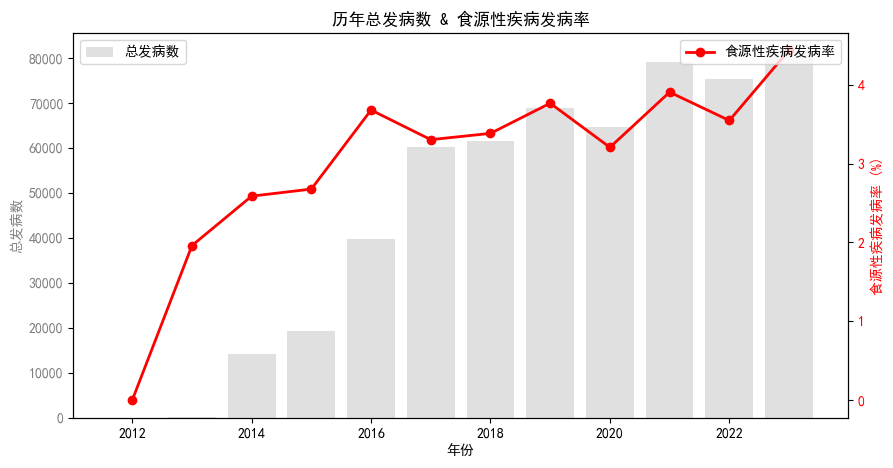

In [99]:
plt.rcParams['font.sans-serif'] = ['SimHei']  # 使用黑体
plt.rcParams['axes.unicode_minus'] = False  # 解决负号无法显示的问题

fig, ax1 = plt.subplots(figsize=(10, 5))

# 左轴：总发病数（柱状图）
ax1.bar(yearly_total_cases.index, yearly_total_cases, color='lightgray', alpha=0.7, label="总发病数")
ax1.set_xlabel("年份")
ax1.set_ylabel("总发病数", color="gray")
ax1.tick_params(axis='y', labelcolor="gray")

# 右轴：食源性疾病发病率（折线图）
ax2 = ax1.twinx()
ax2.plot(yearly_foodborne_rate.index, yearly_foodborne_rate, color="red", marker="o", linestyle="-", linewidth=2, label="食源性疾病发病率")
ax2.set_ylabel("食源性疾病发病率 (%)", color="red")
ax2.tick_params(axis='y', labelcolor="red")

# 添加标题 & 图例
plt.title("历年总发病数 & 食源性疾病发病率")
ax1.legend(loc="upper left")
ax2.legend(loc="upper right")

# 显示图表
plt.show()


In [15]:
df.keys()

Index([' 患者ID', '是否复诊', '是否住院', '患者性别', '患者年龄', '发病日期', '是否采集生物样本', '其他人是否发病',
       '降水量', 'Temperature-before1day', 'Temperature-before2day',
       'Temperature-before3day', 'Temperature-before4day',
       'Temperature-before5day', 'Temperature-before6day',
       'Temperature-before7day', '气候政策不确定性指数', '环保处罚案件数目', 'AQI', '质量等级',
       '经济核算-生产总值（亿元）', '经济核算-人均生产总值（元）', '工资-城镇单位就业人员工资总额和平均工资-平均工资（元）',
       '农业-农、林、牧、渔业总产值（亿元）-农业产值（亿元）', '农业-农、林、牧、渔业总产值（亿元）-林业产值（亿元）',
       '农业-农、林、牧、渔业总产值（亿元）-牧业产值（亿元）', '农业-农、林、牧、渔业总产值（亿元）-渔业产值（亿元）',
       '农业-农、林、牧、渔业总产值（亿元）-农林牧渔业服务业产值（亿元）', '农业-主要农产品产量-肉产量（吨）',
       '农业-主要农产品产量-肉产量（吨）-猪肉产量（吨）', '农业-主要农产品产量-禽蛋产量（吨）', '农业-主要农产品产量-牛奶产量（吨）',
       '农业-水产品产量（万吨）-海水产品产量（万吨）', '农业-水产品产量（万吨）-淡水产品产量（万吨）',
       '农业-农村能源及农业物资消耗-农药使用量（吨）', '文化、卫生和社会服务-文化和卫生-医院卫生院数（个）',
       '文化、卫生和社会服务-文化和卫生-医院卫生床位数（张）', '文化、卫生和社会服务-文化和卫生-医生数（人）',
       '环境与资源-日照时数-1月日照时数（0.1小时）', '环境与资源-日照时数-2月日照时数（0.1小时）',
       '环境与资源-日照时数-3月日照时数（0.1小时）', '环境与资源-日照时数-4月日照时数

# xgboost analysis

In [16]:
df['发病日期'] = pd.to_datetime(df['发病日期'])  # 确保是 datetime 格式

# 按日期聚合，求和病例数，取平均值的数值特征
df_daily = df.groupby('发病日期').agg({
    ' 患者ID': 'count',
    '食源性疾病': 'sum',  # 病例数求和
    '患者年龄': 'median',
    '降水量': 'mean',  # 气象类数据求均值
    **{col: 'mean' for col in df.columns if 'Temperature-before' in col},
    'AQI': 'mean',
    '气候政策不确定性指数': 'mean',
    '环保处罚案件数目': 'mean',
    '质量等级': 'mean',
    '经济核算-人均生产总值（元）': 'mean',
    '经济核算-生产总值（亿元）': 'mean',
    '工资-城镇单位就业人员工资总额和平均工资-平均工资（元）': 'mean',
    **{col: 'mean' for col in df.columns if '农业-农、林、牧、渔业总产值（亿元）-' in col},
    **{col: 'mean' for col in df.columns if '农业-主要农产品产量' in col},
    **{col: 'mean' for col in df.columns if '农业-水产品产量（万吨）' in col},
    '农业-农村能源及农业物资消耗-农药使用量（吨）': 'mean',
    **{col: 'mean' for col in df.columns if '文化、卫生和社会服务-文化和卫生-' in col},
    **{col: 'mean' for col in df.columns if '环境与资源-日照时数-' in col},
    
    # 对于 One-Hot 编码变量，通常采用求和（代表该类出现的次数）
    **{col: 'sum' for col in df.columns if '现在住址地市_' in col or '患者职业_' in col or '食品分类_' in col or '加工及包装方式_' in col 
       or '进食场所类型_' in col },
    '进食-发病时间差': 'mean',
}).reset_index()

## 计算比例

In [17]:
df_daily = df_daily.rename(columns={' 患者ID': '患者人数'}).reset_index()

In [18]:
df_daily

,index,发病日期,患者人数,食源性疾病,患者年龄,降水量,Temperature-before1day,Temperature-before2day,Temperature-before3day,Temperature-before4day,...,加工及包装方式_散装（包括简易包装）,加工及包装方式_预包装,加工及包装方式_餐饮服务业,进食场所类型_农村宴席,进食场所类型_学校,进食场所类型_家庭,进食场所类型_集体食堂,进食场所类型_零售市场,进食场所类型_餐饮服务业,进食-发病时间差
0,0,2012-02-12,5,0,34.0,0.0,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,-1096.000000
1,1,2013-03-16,6,0,37.0,0.0,11.101444,7.228081,6.862120,16.219178,...,0,0,0,0,0,6,0,0,0,-1.000000
2,2,2013-03-29,5,0,35.0,0.0,14.382346,11.004224,7.607310,9.108353,...,0,0,0,0,0,5,0,0,0,-365.000000
3,3,2013-04-11,5,0,6.0,0.0,13.592800,14.094079,14.798250,11.126609,...,0,0,0,0,0,5,0,0,0,-365.000000
4,4,2013-04-16,5,0,1.0,0.0,23.012270,19.339670,19.473026,16.466160,...,0,0,0,0,0,5,0,0,0,-365.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3656,3656,2023-12-27,129,2,25.0,0.0,6.500315,3.648465,3.129707,1.687746,...,12,11,41,0,0,89,4,11,22,178.775194
3657,3657,2023-12-28,105,3,32.0,0.0,8.882964,6.280289,3.513056,2.848809,...,12,19,18,0,0,74,6,0,10,0.314286
3658,3658,2023-12-29,129,7,33.0,0.0,10.221862,9.179061,6.561227,3.831177,...,7,12,34,5,0,63,5,0,31,8.829457
3659,3659,2023-12-30,50,1,29.0,0.0,10.056825,10.314931,9.358878,6.656529,...,0,1,25,0,0,23,0,0,15,2.260000


In [19]:
df_daily['男性比例'] = df.groupby('发病日期')['患者性别'].apply(lambda x: (x == 1).mean()).reset_index(drop=True)
df_daily['复诊比例'] = df.groupby('发病日期')['是否复诊'].mean().reset_index(drop=True)
df_daily['住院比例'] = df.groupby('发病日期')['是否住院'].mean().reset_index(drop=True)


In [21]:
df_daily = df_daily.set_index('发病日期').reset_index()

In [23]:
df_daily = df_daily.drop(columns=['index'], errors='ignore')
df_daily

,发病日期,患者人数,食源性疾病,患者年龄,降水量,Temperature-before1day,Temperature-before2day,Temperature-before3day,Temperature-before4day,Temperature-before5day,...,进食场所类型_农村宴席,进食场所类型_学校,进食场所类型_家庭,进食场所类型_集体食堂,进食场所类型_零售市场,进食场所类型_餐饮服务业,进食-发病时间差,男性比例,复诊比例,住院比例
0,2012-02-12,5,0,34.0,0.0,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,-1096.000000,0.000000,0.000000,0.000000
1,2013-03-16,6,0,37.0,0.0,11.101444,7.228081,6.862120,16.219178,9.458980,...,0,0,6,0,0,0,-1.000000,1.000000,0.000000,0.000000
2,2013-03-29,5,0,35.0,0.0,14.382346,11.004224,7.607310,9.108353,9.233227,...,0,0,5,0,0,0,-365.000000,1.000000,0.000000,0.000000
3,2013-04-11,5,0,6.0,0.0,13.592800,14.094079,14.798250,11.126609,8.279704,...,0,0,5,0,0,0,-365.000000,1.000000,0.000000,0.000000
4,2013-04-16,5,0,1.0,0.0,23.012270,19.339670,19.473026,16.466160,13.421553,...,0,0,5,0,0,0,-365.000000,1.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3656,2023-12-27,129,2,25.0,0.0,6.500315,3.648465,3.129707,1.687746,-1.313503,...,0,0,89,4,11,22,178.775194,0.519380,0.046512,0.077519
3657,2023-12-28,105,3,32.0,0.0,8.882964,6.280289,3.513056,2.848809,1.304180,...,0,0,74,6,0,10,0.314286,0.666667,0.000000,0.000000
3658,2023-12-29,129,7,33.0,0.0,10.221862,9.179061,6.561227,3.831177,3.254482,...,5,0,63,5,0,31,8.829457,0.534884,0.007752,0.069767
3659,2023-12-30,50,1,29.0,0.0,10.056825,10.314931,9.358878,6.656529,3.908025,...,0,0,23,0,0,15,2.260000,0.660000,0.000000,0.020000


In [24]:
df_daily.keys()

Index(['发病日期', '患者人数', '食源性疾病', '患者年龄', '降水量', 'Temperature-before1day',
       'Temperature-before2day', 'Temperature-before3day',
       'Temperature-before4day', 'Temperature-before5day',
       'Temperature-before6day', 'Temperature-before7day', 'AQI', '气候政策不确定性指数',
       '环保处罚案件数目', '质量等级', '经济核算-人均生产总值（元）', '经济核算-生产总值（亿元）',
       '工资-城镇单位就业人员工资总额和平均工资-平均工资（元）', '农业-农、林、牧、渔业总产值（亿元）-农业产值（亿元）',
       '农业-农、林、牧、渔业总产值（亿元）-林业产值（亿元）', '农业-农、林、牧、渔业总产值（亿元）-牧业产值（亿元）',
       '农业-农、林、牧、渔业总产值（亿元）-渔业产值（亿元）', '农业-农、林、牧、渔业总产值（亿元）-农林牧渔业服务业产值（亿元）',
       '农业-主要农产品产量-肉产量（吨）', '农业-主要农产品产量-肉产量（吨）-猪肉产量（吨）', '农业-主要农产品产量-禽蛋产量（吨）',
       '农业-主要农产品产量-牛奶产量（吨）', '农业-水产品产量（万吨）-海水产品产量（万吨）',
       '农业-水产品产量（万吨）-淡水产品产量（万吨）', '农业-农村能源及农业物资消耗-农药使用量（吨）',
       '文化、卫生和社会服务-文化和卫生-医院卫生院数（个）', '文化、卫生和社会服务-文化和卫生-医院卫生床位数（张）',
       '文化、卫生和社会服务-文化和卫生-医生数（人）', '环境与资源-日照时数-1月日照时数（0.1小时）',
       '环境与资源-日照时数-2月日照时数（0.1小时）', '环境与资源-日照时数-3月日照时数（0.1小时）',
       '环境与资源-日照时数-4月日照时数（0.1小时）', '环境与资源-日照时数-5月日照时数（0.1小时）',
 

In [25]:
df_daily.to_csv("data/dailydata.csv",encoding="utf-8-sig")

### 生成时间特征

In [4]:
df['Year'] = df['发病日期'].dt.year
df['Month'] = df['发病日期'].dt.month
df['DayofYear'] = df['发病日期'].dt.dayofyear
df['Weekday'] = df['发病日期'].dt.weekday  # 0=Monday, 6=Sunday

In [5]:
df["发病日期"].value_counts()

发病日期
2016-07-03    509
2023-05-02    424
2018-09-25    419
2022-08-15    412
2021-05-17    410
             ... 
2014-04-30      4
2014-02-22      4
2015-03-13      4
2014-01-22      4
2013-12-20      1
Name: count, Length: 3661, dtype: int64

In [108]:
weekly_cases = df.groupby("YearWeek")["发病日期"].count()
weekly_foodborne_cases = df.groupby("YearWeek")["食源性疾病"].sum()

In [109]:
df_weekly = pd.DataFrame({
    "Total_Cases": weekly_cases,
    "Foodborne_Cases": weekly_foodborne_cases
})

In [110]:
df_weekly["Foodborne_Rate"] = df_weekly["Foodborne_Cases"] / df_weekly["Total_Cases"] * 100

In [111]:
# **创建目标变量 (下周的发病率)**
df_weekly["Target"] = df_weekly["Foodborne_Rate"].shift(-1)  # 预测下周数据
df_weekly.dropna(inplace=True)  # 去除 NaN 行

In [112]:
df_weekly

,Total_Cases,Foodborne_Cases,Foodborne_Rate,Target
YearWeek,,,,
2012-02-06/2012-02-12,5,0,0.000000,0.000000
2013-03-11/2013-03-17,6,0,0.000000,0.000000
2013-03-25/2013-03-31,5,0,0.000000,0.000000
2013-04-08/2013-04-14,5,0,0.000000,0.000000
2013-04-15/2013-04-21,5,0,0.000000,0.000000
...,...,...,...,...
2023-11-20/2023-11-26,1290,43,3.333333,3.518374
2023-11-27/2023-12-03,1279,45,3.518374,3.798587
2023-12-04/2023-12-10,1132,43,3.798587,4.158790


In [113]:
df_weekly["Year"] = df_weekly.index.year
df_weekly["Week"] = df_weekly.index.week
df_weekly["DayofYear"] = df_weekly.index.dayofyear  # 一年中的第几天

# 创建滞后特征（Lag Features）
df_weekly["Lag_1"] = df_weekly["Foodborne_Rate"].shift(1)  # 滞后 1 周
df_weekly["Lag_2"] = df_weekly["Foodborne_Rate"].shift(2)  # 滞后 2 周
df_weekly["Lag_3"] = df_weekly["Foodborne_Rate"].shift(3)  # 滞后 3 周
df_weekly["Rolling_Mean_4"] = df_weekly["Foodborne_Rate"].rolling(window=4).mean()  # 过去 4 周均值
df_weekly.dropna(inplace=True)

In [114]:
df_weekly

,Total_Cases,Foodborne_Cases,Foodborne_Rate,Target,Year,Week,DayofYear,Lag_1,Lag_2,Lag_3,Rolling_Mean_4
YearWeek,,,,,,,,,,,
2013-04-08/2013-04-14,5,0,0.000000,0.000000,2013,15,104,0.000000,0.000000,0.000000,0.000000
2013-04-15/2013-04-21,5,0,0.000000,0.000000,2013,16,111,0.000000,0.000000,0.000000,0.000000
2013-12-16/2013-12-22,1,0,0.000000,7.692308,2013,51,356,0.000000,0.000000,0.000000,0.000000
2013-12-23/2013-12-29,13,1,7.692308,1.333333,2013,52,363,0.000000,0.000000,0.000000,1.923077
2013-12-30/2014-01-05,150,2,1.333333,1.438849,2014,1,5,7.692308,0.000000,0.000000,2.256410
...,...,...,...,...,...,...,...,...,...,...,...
2023-11-20/2023-11-26,1290,43,3.333333,3.518374,2023,47,330,3.465765,4.852321,3.652058,3.825869
2023-11-27/2023-12-03,1279,45,3.518374,3.798587,2023,48,337,3.333333,3.465765,4.852321,3.792448
2023-12-04/2023-12-10,1132,43,3.798587,4.158790,2023,49,344,3.518374,3.333333,3.465765,3.529015


In [115]:
external_features = [
    '降水量', 'AQI', 'Temperature-before1day', '气候政策不确定性指数',
    '经济核算-生产总值（亿元）', '工资-城镇单位就业人员工资总额和平均工资-平均工资（元）'
]

df_external = df.groupby("YearWeek")[external_features].mean()  # 计算周均值
df_weekly = df_weekly.join(df_external, on="YearWeek")  # 合并数据
df_weekly.dropna(inplace=True)

In [117]:
df_weekly.keys()

Index(['Total_Cases', 'Foodborne_Cases', 'Foodborne_Rate', 'Target', 'Year',
       'Week', 'DayofYear', 'Lag_1', 'Lag_2', 'Lag_3', 'Rolling_Mean_4', '降水量',
       'AQI', 'Temperature-before1day', '气候政策不确定性指数', '经济核算-生产总值（亿元）',
       '工资-城镇单位就业人员工资总额和平均工资-平均工资（元）'],
      dtype='object')